# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
#Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Liaoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=liaoyang
Processing Record 2 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=zyryanka
Processing Record 3 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=butaritari
Processing Record 4 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=hermanus
Processing Record 5 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=geraldton
Processing Record 6 | Parker
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=parker
Processing Record 7 | Teguldet
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 57 | Bichura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=bichura
Processing Record 58 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=severo-kurilsk
Processing Record 59 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=mogadishu
Processing Record 60 | Werda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=werda
Processing Record 61 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=ixtapa
Processing Record 62 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=khatanga
City not found. Skipping...
Processing Record 63 | Awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f9

City not found. Skipping...
City not found. Skipping...
Processing Record 113 | Iranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=iranshahr
Processing Record 114 | Ban Nahin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=ban nahin
Processing Record 115 | Nakhon Thai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=nakhon thai
Processing Record 116 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=kruisfontein
Processing Record 117 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=kapaa
Processing Record 118 | Narrabri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=narrabri
Processing Record 119 | East London
http://api.openweathermap.

City not found. Skipping...
Processing Record 168 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=norman wells
Processing Record 169 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=tessalit
Processing Record 170 | Lekoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=lekoni
City not found. Skipping...
Processing Record 171 | Williams Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=williams lake
Processing Record 172 | Clifton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=clifton
Processing Record 173 | Alterosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=alterosa
Processing Record 174 | Moerai
http://api.openweathermap.org/d

Processing Record 224 | Dubna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=dubna
Processing Record 225 | Povenets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=povenets
Processing Record 226 | Tacoronte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=tacoronte
Processing Record 227 | Srandakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=srandakan
Processing Record 228 | Zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=zhanaozen
City not found. Skipping...
Processing Record 229 | Amazar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=amazar
Processing Record 230 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f

Processing Record 279 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=labuhan
City not found. Skipping...
Processing Record 280 | Manzhouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=manzhouli
Processing Record 281 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=roald
City not found. Skipping...
Processing Record 282 | Mataram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=mataram
Processing Record 283 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=bud
Processing Record 284 | Plettenberg Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=plettenberg bay
Processing Record 285 | Mwanza
http://api.openweathermap.org/data/2.5/weather?

Processing Record 335 | Wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=wilmington
Processing Record 336 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=mount gambier
Processing Record 337 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=adrar
Processing Record 338 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=faya
Processing Record 339 | Mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=mareeba
City not found. Skipping...
Processing Record 340 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=ostrovnoy
Processing Record 341 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 390 | Khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=khani
Processing Record 391 | Maniwaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=maniwaki
Processing Record 392 | Fort-Shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=fort-shevchenko
Processing Record 393 | Dasoguz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=dasoguz
Processing Record 394 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=yeppoon
Processing Record 395 | Ishinomaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=ishinomaki
Processing Record 396 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b

Processing Record 446 | Elat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=elat
Processing Record 447 | Petrovsk-Zabaykalskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=petrovsk-zabaykalskiy
Processing Record 448 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=flin flon
Processing Record 449 | Tucuman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=tucuman
Processing Record 450 | Mago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=mago
Processing Record 451 | Douglas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=douglas
Processing Record 452 | Kayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e

City not found. Skipping...
Processing Record 501 | Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=marawi
Processing Record 502 | Muhos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=muhos
Processing Record 503 | Loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=loandjili
Processing Record 504 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=riyadh
Processing Record 505 | Kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=kodinsk
Processing Record 506 | Sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b3539dd0e1fd59adf&q=sharjah
Processing Record 507 | Cassia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=570f5f962d51594b353

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv(r'weather_csv')


In [7]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Liaoyang,100,CN,1559779320,78,41.27,123.17,71.60,6.71
1,Zyryanka,69,RU,1559779321,47,65.73,150.89,52.43,9.64
2,Butaritari,46,KI,1559779322,79,3.07,172.79,85.19,16.24
3,Hermanus,54,ZA,1559779323,99,-34.42,19.24,51.01,5.99
4,Geraldton,40,CA,1559779325,32,49.72,-86.95,66.20,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

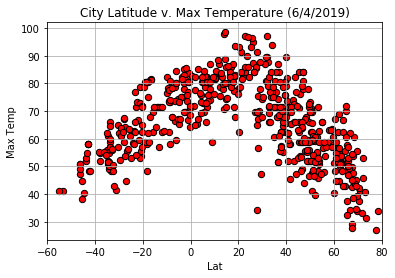

In [16]:
weather_data.plot.scatter('Lat', 
                       'Max Temp', 
                       title='City Latitude v. Max Temperature (6/4/2019)', 
                       marker='o', 
                       s=40,
                       xlim=[-60, 80],
                       color='red', 
                       edgecolor='black', 
                       grid=True)

#### Latitude vs. Humidity Plot

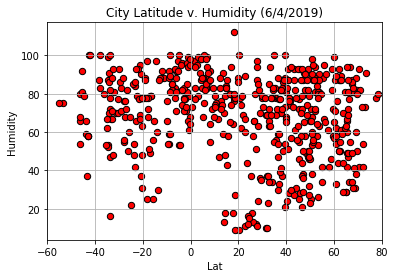

In [13]:
weather_data.plot.scatter('Lat', 
                       'Humidity', 
                       title='City Latitude v. Humidity (6/4/2019)', 
                       marker='o', 
                       s=40,
                       xlim=[-60, 80],                      
                       color='red', 
                       edgecolor='black', 
                       grid=True)

#### Latitude vs. Cloudiness Plot

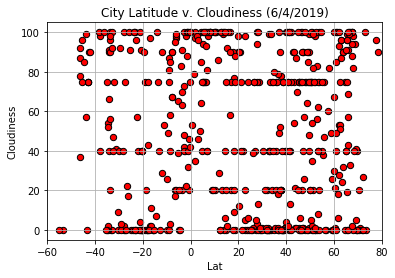

In [14]:
weather_data.plot.scatter('Lat', 
                       'Cloudiness', 
                       title='City Latitude v. Cloudiness (6/4/2019)', 
                       marker='o', 
                       s=40,
                       xlim=[-60, 80],
                       color='red', 
                       edgecolor='black', 
                       grid=True)

#### Latitude vs. Wind Speed Plot

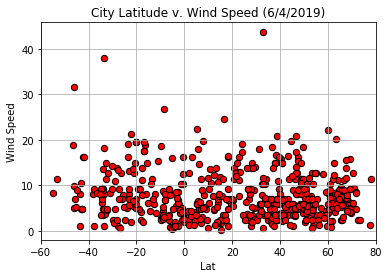

In [15]:
weather_data.plot.scatter('Lat', 
                       'Wind Speed', 
                       title='City Latitude v. Wind Speed (6/4/2019)', 
                       marker='o', 
                       s=40,
                       xlim=[-60, 80],
                       color='red', 
                       edgecolor='black', 
                       grid=True)